In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import warnings
warnings.filterwarnings(action='ignore')

In [74]:
import yfinance as yf
# Define the ticker symbol
ticker_symbol = 'AMZN'  # Example: Apple Inc.
# Set the start and end dates for the data
# Fetch the data
data = yf.download(ticker_symbol)

[*********************100%%**********************]  1 of 1 completed


In [75]:
data.reset_index(inplace= True)

In [76]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [77]:
data.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis = 1,inplace= True)

In [100]:
data.head()

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


In [101]:
# slicing dataframe and reseting index 
df= data.iloc[3179:,:]
df.reset_index(drop= True,inplace=True)
df.head()

,Date,Close
0,2010-01-04,6.6950
1,2010-01-05,6.7345
2,2010-01-06,6.6125
3,2010-01-07,6.5000
4,2010-01-08,6.6760


In [97]:
# Normalizing df['Close'] columns
min_val = np.min(df['Close'])
max_val = np.max(df['Close'])
df['Close'] = (df['Close'] - min_val) / (max_val - min_val)

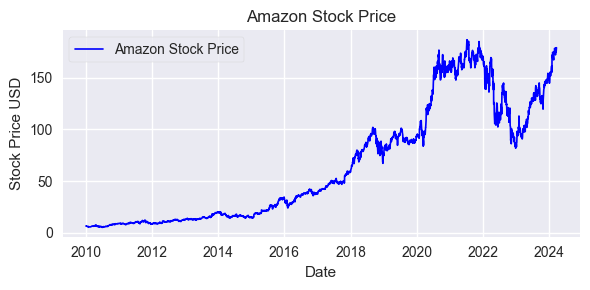

In [102]:
# converting date object into Date time format
df['Date'] = pd.to_datetime(df['Date'])
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6,3))

#ploting df[Close] price with respect to date
plt.plot(df['Date'], df['Close'],color = 'blue', linewidth = 1.2,label = 'Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel("Stock Price USD")
plt.title('Amazon Stock Price')
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

  0%|                                                                                         | 0/3559 [00:00<?, ?it/s]

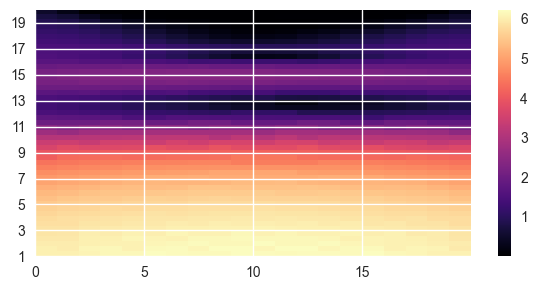

  0%|                                                                                         | 0/3559 [00:00<?, ?it/s]


In [103]:
from tqdm import tqdm
# selecting window size
start = 0
end = 20
i =1
x_ticks = np.arange(0,20,5)
y_ticks = np.arange(1,20,2)
for i in tqdm(range(len(df)-20)):
    scales = np.arange(1,50)
    #perform continuous wavelet transform
    coeffs, freqs= pywt.cwt(df['Close'].iloc[start:end:1], scales =scales, wavelet = "cmor1.5-1.0")
    start +=1
    end +=1
    plt.figure(figsize= (6,3))
    # ploting scalogram
    plt.imshow(np.abs(coeffs), extent=[0,20,1,20], cmap='magma', aspect='auto')
    # plt.title(df['Close'].iloc[end+1])
    plt.colorbar()
    plt.grid(True)
    plt.savefig(f'stock_{i+1}.jpg')
    plt.yticks(y_ticks)
    plt.xticks(x_ticks)
    plt.tight_layout()
    plt.show()
    break

In [14]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'AAPL'  # Example: Apple Inc.

# Set the start and end dates for the data
start_date = '2020-01-01'
end_date = '2022-01-01'

# Fetch the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the first few rows of the dataframe
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059418  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349136  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925644  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.582657  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.750252  132079200


In [43]:
data.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...,...
500,2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
501,2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
502,2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000
503,2021-12-30,169.699997,170.888000,168.524002,168.644501,168.644501,37584000


1 0


[2, 4]